<center>
<img src="https://supportvectors.ai/logo-poster-transparent.png" width="400px" style="opacity:0.7">
</center>

In [1]:
%run supportvectors-common.ipynb


<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



# Image classification with Vision Transformer and ResNet

In this lab we will review the results of applying transfer learning to ResNet and VIT pre-trained models. 

Please run `src/svlearn_vit_cnn/transfer_learning/trees_classification.py` twice - once after updating `current_task` to `resnet_classification` in the `config.yaml` and once after updating it to `vit_classification`.

This step is mandatory before running the rest of this notebook. These scripts will train the classification head of the model.


In [2]:

from PIL import Image
import json
import joblib

from svlearn.common.utils import ensure_directory
# huggingface
from transformers import ViTImageProcessor, ViTForImageClassification

# sklearn
from sklearn.preprocessing import LabelEncoder

In [3]:
# configurations

from svlearn_vit_cnn import config

data_dir = config['tree-dataset']['path']
raw_dir = data_dir + "/trees"
processed_dir = data_dir + "/preprocessed"
ensure_directory(processed_dir)

In [4]:
results_dir = config['vision-transformer']['results']
ensure_directory(results_dir)

model_name_or_path = 'google/vit-base-patch16-224-in21k'
vit_processor = ViTImageProcessor.from_pretrained(model_name_or_path)

vit_model_dir = results_dir
vit_model: ViTForImageClassification = ViTForImageClassification.from_pretrained(vit_model_dir, output_attentions=True, attn_implementation="eager")
vit_model.eval()

vit_label_encoder: LabelEncoder = joblib.load(f"{results_dir}/label_encoder.joblib")
labels = vit_label_encoder.classes_
labels

array(['Oak', 'WeepingWillow'], dtype=object)

In [5]:
from transformers import AutoImageProcessor, ResNetForImageClassification

results_dir = config['cnn']['results']
ensure_directory(results_dir)

model_name_or_path = 'microsoft/resnet-50'
resnet_processor = AutoImageProcessor.from_pretrained(model_name_or_path)

resnet_model_dir = results_dir
resnet_model: ResNetForImageClassification = ResNetForImageClassification.from_pretrained(resnet_model_dir, output_attentions=True, attn_implementation="eager")
resnet_model.eval()

resnet_label_encoder: LabelEncoder = joblib.load(f"{results_dir}/label_encoder.joblib")
labels = resnet_label_encoder.classes_
labels

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


array(['Oak', 'WeepingWillow'], dtype=object)

In [6]:
vit_model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [7]:
resnet_model

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

In [8]:
vit_model.config

ViTConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "Oak",
    "1": "WeepingWillow"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Oak": "0",
    "WeepingWillow": "1"
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "output_attentions": true,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "problem_type": "single_label_classification",
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.50.0"
}

In [9]:
resnet_model.config

ResNetConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "ResNetForImageClassification"
  ],
  "depths": [
    3,
    4,
    6,
    3
  ],
  "downsample_in_bottleneck": false,
  "downsample_in_first_stage": false,
  "embedding_size": 64,
  "hidden_act": "relu",
  "hidden_sizes": [
    256,
    512,
    1024,
    2048
  ],
  "id2label": {
    "0": "Oak",
    "1": "WeepingWillow"
  },
  "label2id": {
    "Oak": "0",
    "WeepingWillow": "1"
  },
  "layer_type": "bottleneck",
  "model_type": "resnet",
  "num_channels": 3,
  "out_features": [
    "stage4"
  ],
  "out_indices": [
    4
  ],
  "output_attentions": true,
  "problem_type": "single_label_classification",
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4"
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.50.0"
}

We load an image that the model has not yet seen. You can download the image from [here](https://www.nashvilletreeconservationcorps.org/treenews/how-many-oak-tree-varieties)

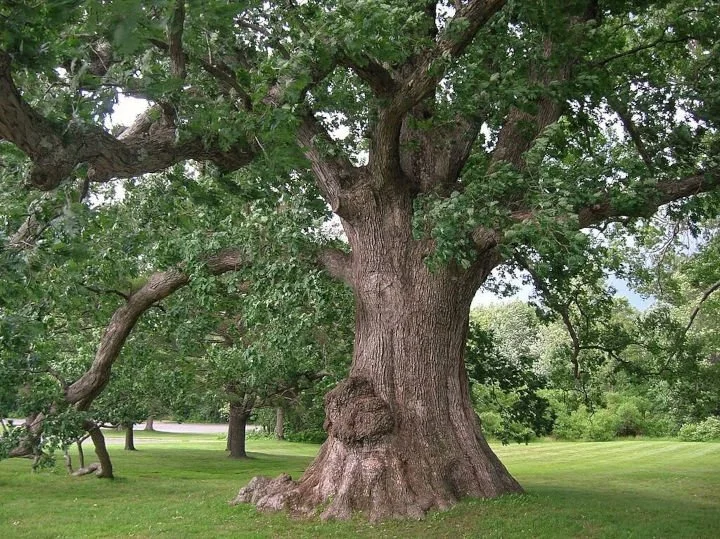

In [10]:
validation_sample = Image.open(f"{data_dir}/test_oak_tree.webp")
validation_sample

In [11]:
input = vit_processor(validation_sample, return_tensors="pt")
vit_label_encoder.inverse_transform(vit_model(**input).logits.argmax(axis=1))

array(['Oak'], dtype=object)

In [12]:
input = resnet_processor(validation_sample, return_tensors="pt")
resnet_label_encoder.inverse_transform(resnet_model(**input).logits.argmax(axis=1))

array(['Oak'], dtype=object)

In [13]:
input['pixel_values'].shape

torch.Size([1, 3, 224, 224])

Let's evaluate it's performance on the validation dataset and compute the evaluation metrics to get the entire picture.

In [14]:
with open(f"{resnet_model_dir}/eval_results.json") as f:
    eval_results_tl = json.load(f)

eval_results_tl

{'epoch': 50.0,
 'eval_accuracy': 0.9385964912280702,
 'eval_f1': 0.8985507246376812,
 'eval_loss': 0.2744981348514557,
 'eval_precision': 0.9393939393939394,
 'eval_recall': 0.8611111111111112,
 'eval_runtime': 7.5927,
 'eval_samples_per_second': 15.014,
 'eval_steps_per_second': 1.976}

In [15]:
with open(f"{vit_model_dir}/eval_results.json") as f:
    eval_results_tl = json.load(f)

eval_results_tl

{'epoch': 50.0,
 'eval_accuracy': 0.9912280701754386,
 'eval_f1': 0.9863013698630136,
 'eval_loss': 0.05422849953174591,
 'eval_precision': 0.972972972972973,
 'eval_recall': 1.0,
 'eval_runtime': 7.3868,
 'eval_samples_per_second': 15.433,
 'eval_steps_per_second': 2.031}

Looks like our models perform extremely well with training only the classification layers. 

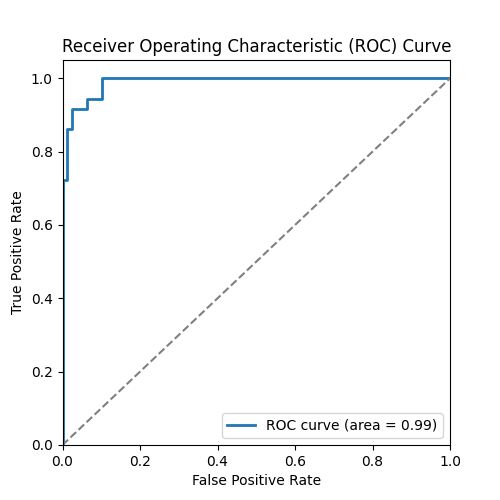

In [16]:
Image.open(f"{resnet_model_dir}/roc.png")

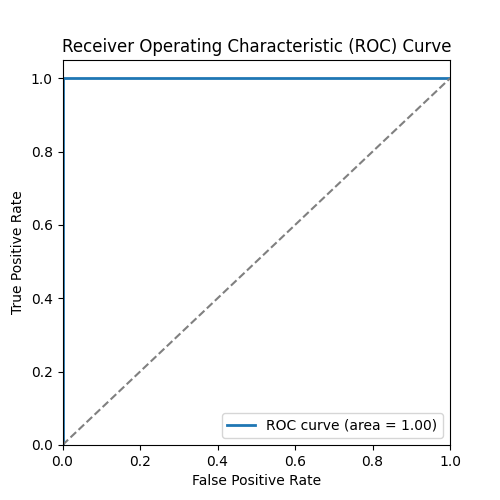

In [17]:
Image.open(f"{vit_model_dir}/roc.png")

let's also take a look at how long transfer learning took to train

In [18]:
with open(f"{resnet_model_dir}/train_results.json") as f:
    train_results_tl= json.load(f)

train_results_tl

{'epoch': 50.0,
 'total_flos': 4.8310542798336e+17,
 'train_loss': 0.3174969640271417,
 'train_runtime': 235.2544,
 'train_samples_per_second': 96.704,
 'train_steps_per_second': 6.164}

In [19]:
with open(f"{vit_model_dir}/train_results.json") as f:
    train_results_tl= json.load(f)

train_results_tl

{'epoch': 50.0,
 'total_flos': 1.762942763731968e+18,
 'train_loss': 0.12040520766685749,
 'train_runtime': 288.5559,
 'train_samples_per_second': 78.841,
 'train_steps_per_second': 5.025}